## Content Based Recommendation Systems :

* It will recommend the movies based on the similarities of your movie choice

In [34]:
import numpy as np
import pandas as pd

#### Data :

In [36]:
column_names = ['user_id' , 'item_id' , 'rating' , 'timestamp']

df = pd.read_csv('u.data' , sep = '\t' , names = column_names)

In [37]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


##### Now, let's get the movie titles :

In [39]:
movie_titles = pd.read_csv('Movie_Id_Titles')

movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


* Now there is some sort of correlation between item_id and the title 

* instead of having the meaning less item_id column in the `df` we can merge that item_id with their respective titles

In [40]:
df = pd.merge(df , movie_titles , on = 'item_id' )

df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


### EDA :

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [42]:
sns.set_style('white')

###### Let's create a `ratings` dataframe with `average rating` and `no.of ratings` :

In [43]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

**`Note that we did group by and hence there might be some movies with 5 star rating but watched by one or two people`**

* Let's see the movies with the most ratings :

In [44]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

**DataFrame :**

In [45]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


* Let's add the numbern of ratings column :

In [46]:
ratings['no.of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

ratings.head()

,rating,no.of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


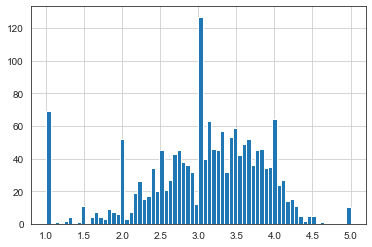

In [47]:
ratings['rating'].hist(bins=70)

**Interpretation :**

* More no.of people gave the rating around 3 and these movies are popular becuase more no.of people might have watched them

* Outliers at 1 : These movies are really bad and hence less no.of people might have watched them 

* Outliers at 5 : These movies are really good but there might be a chance where a very few people have watched them

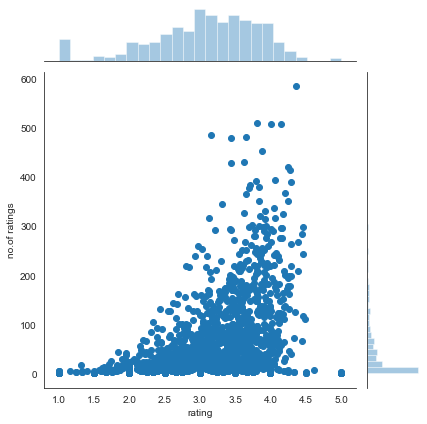

In [48]:
sns.jointplot(x='rating' , y='no.of ratings' , data=ratings)

___________________________________________

### Recommending Similar Movies :

* Now let's create a matrix with user_id on one axis and movie title on the other axis

* Each cell conists of rating the user has given to that movie

* There will be a lot of NaN values because most people have not seen most of the movies

In [49]:
moviemat = pd.pivot_table(data=df,index='user_id' , columns='title' , values='rating')

moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### Most rated movie :

In [50]:
ratings.sort_values('no.of ratings' , ascending=False).head(10)

,rating,no.of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


**Let's choose two movies :**

* 1) Star Wars (a scify)

* 2) Liar Liar (a comedy)

###### Now let's grab the user ratings fot these two movies :

In [51]:
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']

In [52]:
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

###### We can use corrwith() method to get the correlation between two pandas series 

In [53]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

C:\Users\tvnsk\Anaconda3x\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\tvnsk\Anaconda3x\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


###### Let's clean this by removing NaN values and use Pandas DataFrame instead of Series :

In [54]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns=['Correlation'])

corr_starwars.dropna(inplace=True)

corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


**The above DataFrame tells us how (Ex :`1-900`) movies' user_ratings were correlated with the user_ratings of starwars movie**

* Sort the above DataFrame by correlation :

In [55]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


* ` Now we have got a bunch of movies that are perfectly correlated `

* So according to our model `Man of the year`, `Hollow Reed`, etc., are perfectly correlated with the `Starwars` movie

**But the problem is mostly likely these type of never heard movies happened to have been seen only by one person who also happened to rate Star wars**

* Let's try to fix this problem by filtering out movies that have less no.of ratings : <100 (from the below histogram)

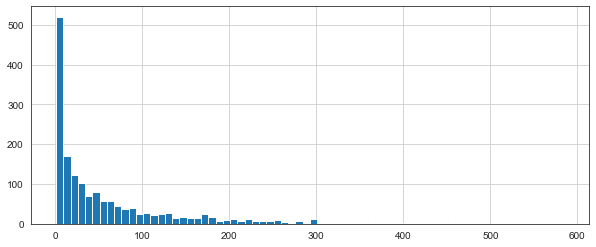

In [56]:
plt.figure(figsize=(10,4))

ratings['no.of ratings'].hist(bins=70)

In [58]:
corr_starwars = corr_starwars.join(ratings['no.of ratings'])

* The reason for using join is we have title as the index

In [60]:
corr_starwars.head()

,Correlation,no.of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


* Now filter out movies that do not have atleast 100 ratings

* We could see how the titles make a lot of sense :

In [61]:
corr_starwars[corr_starwars['no.of ratings'] > 100].sort_values('Correlation', ascending=False).head()

,Correlation,no.of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


**Now from the above output we could see starwars is followed by another starwars movie `Empire Strikes Back` with a high correlation**

**And there is a big drop in the correlation at `Austin powers` which is a comedy movie but the reason it has been put in the recommendations is : the film is as popular as starwars**

**And this is the reason all the popular movies will also be recommended to other people as well**

In [63]:
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns=['Correlation'])

corr_liarliar.dropna(inplace=True)

corr_liarliar = corr_liarliar.join(ratings['no.of ratings'])

corr_liarliar[corr_liarliar['no.of ratings'] > 100].sort_values('Correlation', ascending=False).head()

,Correlation,no.of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
